In [65]:
import pandas as pd
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import preprocessing
from sklearn import metrics as skmet
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
from scipy.stats.stats import pearsonr
import itertools
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
pd.set_option('display.expand_frame_repr', False)
%matplotlib inline

       X     Y  class        c
0  31.95  7.95      3  #111B45
1  31.15  7.30      3  #111B45
2  30.45  6.65      3  #111B45
3  29.70  6.00      3  #111B45
4  28.90  5.55      3  #111B45


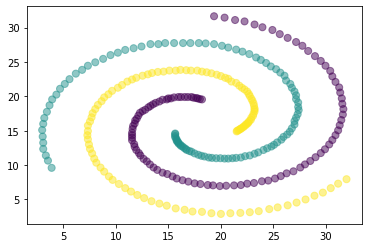

In [66]:
spirals_data=pd.read_csv('spirals.txt', sep=",", header=None)
spirals_data.columns = ["X", "Y", "class"]
spirals_data=spirals_data.drop(0).reset_index(drop=True)
spirals_data[["class","X","Y"]]=spirals_data[["class","X","Y"]].apply(pd.to_numeric)
colors = ['#DF2020', '#81DF20', '#2095DF','#111B45']
spirals_data['c'] = spirals_data["class"].map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})
print(spirals_data.head())
plt.scatter(data=spirals_data ,x="X", y="Y", c=spirals_data['class'].astype(float), alpha = 0.5, s=50)

In [67]:
def Gaussian_similarity_f(x_i,x_j, sigma) :
    distance=np.linalg.norm(x_i - x_j)
    return np.exp(-distance**2/(2.*(sigma**2.)))

def c_i_j (labels,i,j) :
    if (labels[i]==labels[j]):
        return 1
    else:
        return 0
        
def tao_index (data , labels,sigma) :
    tao=0;
    for i in range (0,len(labels)):
        nominator=0.0 ;
        denominator=0.0
        for j in range (0,len(labels)) :
            if(j!=i):
                similarity=Gaussian_similarity_f(data.loc[i],data.loc[j],sigma)
                nominator=nominator+c_i_j(labels,i,j)*similarity
                denominator=denominator+similarity
        tao=tao+nominator/denominator
    tao=tao/len(labels)
    return tao
    
    
#tao_index(spirals_data.drop(['class','c'],axis=1),spirals_data['class'],1)

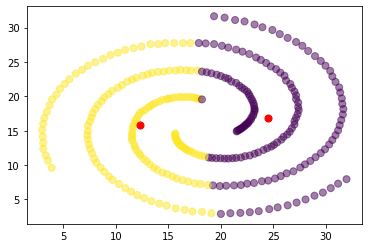

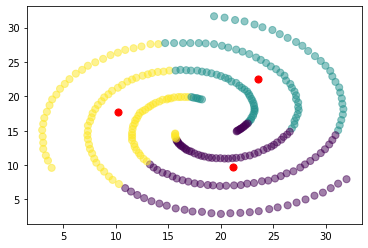

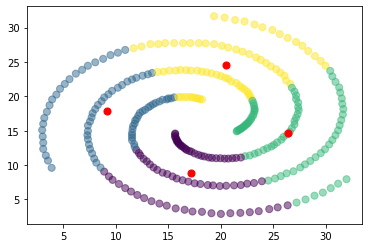

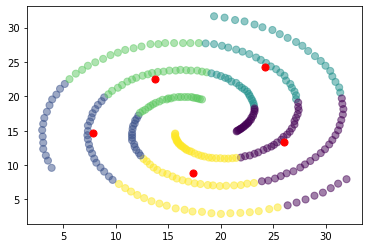

SI Index :  [0.3472315326025985, 0.3610559347153563, 0.3546254779174663, 0.3458173387831364]
DB Index :  [1.1675961779156903, 0.8880176695844159, 0.8767483123214015, 0.8968345504111929]
NMI Index :  [0.00044118674451521845, 0.0004937535669545755, 0.0024115815424910984, 0.006599822806612722]
Tao Index [0.9657566578265144, 0.9266228864333834, 0.9348960620599183, 0.9259556791558896]


In [68]:
KMeans_tao_list=[]
KMeans_SI_list=[]
KMeans_DB_list=[]
KMeans_NMI_list=[]
for i in range (2,6) :
    kmeans = KMeans(n_clusters=i).fit(spirals_data.drop(['class','c'],axis=1))
    centroids = kmeans.cluster_centers_
    #print(centroids)

    plt.scatter(spirals_data['X'], spirals_data['Y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()
    KMeans_NMI_list.append(skmet.normalized_mutual_info_score(spirals_data['class'],kmeans.labels_))
    KMeans_DB_list.append(skmet.davies_bouldin_score(spirals_data.drop(['class','c'],axis=1), kmeans.labels_))
    KMeans_tao_list.append(tao_index(spirals_data.drop(['class','c'],axis=1),kmeans.labels_,1))
    KMeans_SI_list.append(skmet.silhouette_score(spirals_data.drop(['class','c'],axis=1), kmeans.labels_, metric='euclidean'))
    
print("SI Index : " , KMeans_SI_list)
print("DB Index : ",  KMeans_DB_list)
print("NMI Index : " , KMeans_NMI_list)
print("Tao Index" , KMeans_tao_list)

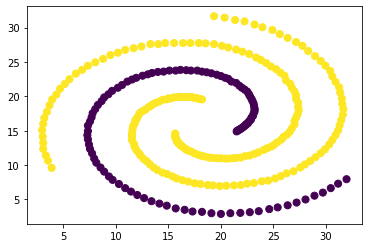

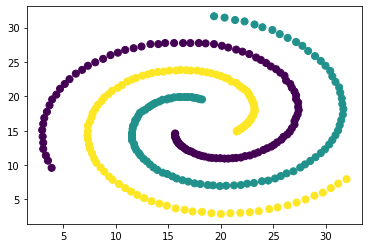

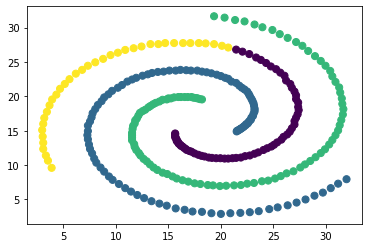

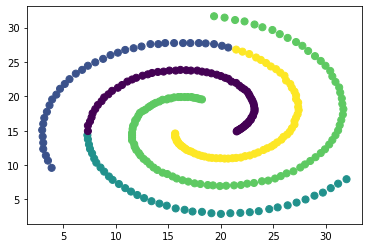

SI Index :  [0.01829442495945484, 0.0013442973442779936, -0.011778802678526653, 0.015452943268393545]
DB Index :  [6.901293288742108, 5.882022552277642, 6.9136926313607265, 5.458556431446378]
NMI Index :  [0.7369397599855175, 1.0, 0.9095789586844116, 0.8325369036537793]
Tao Index [0.999645591442831, 0.9994790295553357, 0.9949032410984009, 0.9896731274638444]


In [69]:
Spectral_SI_list=[]
Spectral_NMI_list=[]
Spectral_DB_list=[]
Spectral_tao_list=[]
for i in range (2,6) :
    clustering=SpectralClustering(n_clusters=i,  n_init=10, gamma=1.0, affinity='rbf',assign_labels='kmeans').fit(spirals_data.drop(['class','c'],axis=1))

    plt.scatter(spirals_data['X'],spirals_data['Y'], c= clustering.labels_.astype(float), s=50, alpha=1)
    plt.show()
    
    
    Spectral_tao_list.append(tao_index(spirals_data.drop(['class','c'],axis=1),clustering.labels_,1))
    Spectral_NMI_list.append(skmet.normalized_mutual_info_score(spirals_data['class'], clustering.labels_))
    Spectral_DB_list.append(skmet.davies_bouldin_score(spirals_data.drop(['class','c'],axis=1), clustering.labels_))
    Spectral_SI_list.append(skmet.silhouette_score(spirals_data.drop(['class','c'],axis=1), clustering.labels_, metric='euclidean'))
    
    
print("SI Index : " , Spectral_SI_list)
print("DB Index : ",  Spectral_DB_list)
print("NMI Index : " , Spectral_NMI_list)
print("Tao Index" , Spectral_tao_list)

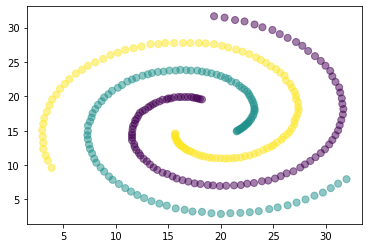

SI Index :  [0.0013442973442779936]
DB Index :  [5.882022552277642]
NMI Index :  [1.0]
Tao Index [0.9994790295553357]


In [70]:
Spectral_SI_list=[]
Spectral_NMI_list=[]
Spectral_DB_list=[]
Spectral_tao_list=[]
clustering=SpectralClustering(n_clusters=3,  n_init=50, gamma=1.0, affinity='rbf',assign_labels='kmeans').fit(spirals_data.drop(['class','c'],axis=1))

plt.scatter(spirals_data['X'],spirals_data['Y'], c= clustering.labels_.astype(float), s=50, alpha=0.5)
plt.show()
    
    
Spectral_tao_list.append(tao_index(spirals_data.drop(['class','c'],axis=1),clustering.labels_,1))
Spectral_NMI_list.append(skmet.normalized_mutual_info_score(spirals_data['class'], clustering.labels_))
Spectral_DB_list.append(skmet.davies_bouldin_score(spirals_data.drop(['class','c'],axis=1), clustering.labels_))
Spectral_SI_list.append(skmet.silhouette_score(spirals_data.drop(['class','c'],axis=1), clustering.labels_, metric='euclidean'))
    
    
print("SI Index : " , Spectral_SI_list)
print("DB Index : ",  Spectral_DB_list)
print("NMI Index : " , Spectral_NMI_list)
print("Tao Index" , Spectral_tao_list)